<a href="https://colab.research.google.com/github/chordc/SDL/blob/main/Demo_ppo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Demo

In [ ]:
!ls
%cd /content/sample_data/

drive  sample_data
/content/sample_data


## PhySO is a package from [Tenachi et al 2023](https://arxiv.org/abs/2303.03192).  
**link to github: https://github.com/WassimTenachi/PhySO/blob/main**

In [ ]:
!git clone https://github.com/WassimTenachi/PhySO.git

Cloning into 'PhySO'...
remote: Enumerating objects: 1428, done.
remote: Counting objects: 100% (303/303), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 1428 (delta 168), reused 274 (delta 147), pack-reused 1125
Receiving objects: 100% (1428/1428), 133.61 MiB | 23.18 MiB/s, done.
Resolving deltas: 100% (791/791), done.


In [ ]:
%cd PhySO/

/content/sample_data/PhySO


**Install PhySO**

In [ ]:
!pip install -r requirements_display2.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest 7.2.2 requires attrs>=19.2.0, but you have attrs 18.2.0 which is incompatible.


In [ ]:
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/sample_data/PhySO
  Preparing metadata (setup.py) ... done
  Running setup.py develop for physo


In [ ]:
import physo

/content/sample_data/PhySO/physo/physym/program.py:20: UserWarning: Can not import display packages.
  warnings.warn("Can not import display packages.")


In [ ]:
%cd ..

/content/sample_data


**Load our data**
or you can upload your own data

In [ ]:
!wget https://raw.githubusercontent.com/chordc/SDL/main/Datasets/MT_data.csv -O MT_data.csv

--2023-04-18 13:13:33--  https://raw.githubusercontent.com/chordc/SDL/main/Datasets/MT_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2115 (2.1K) [text/plain]
Saving to: ‘MT_data.csv’

MT_data.csv         100%[===================>]   2.07K  --.-KB/s    in 0s      

2023-04-18 13:13:34 (26.8 MB/s) - ‘MT_data.csv’ saved [2115/2115]



## Exploring some algorithms of Reinforcement learning 
**import our proxy policy gradient code to combine with PhySO**.  
note that display module can not be used, we try to solve this problem as soon.

In [ ]:
!wget https://raw.githubusercontent.com/chordc/SDL/main/Projects/acmodel.py -O acmodel.py
!wget https://raw.githubusercontent.com/chordc/SDL/main/Projects/ppo.py -O ppo.py
!wget https://raw.githubusercontent.com/chordc/SDL/main/Projects/learnppo.py -O learnppo.py
!wget https://raw.githubusercontent.com/chordc/SDL/main/Projects/train_ppo.py -O train_ppo.py

--2023-04-18 13:13:34--  https://raw.githubusercontent.com/chordc/SDL/main/Projects/acmodel.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3572 (3.5K) [text/plain]
Saving to: ‘acmodel.py’

acmodel.py          100%[===================>]   3.49K  --.-KB/s    in 0s      

2023-04-18 13:13:34 (39.3 MB/s) - ‘acmodel.py’ saved [3572/3572]

--2023-04-18 13:13:34--  https://raw.githubusercontent.com/chordc/SDL/main/Projects/ppo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13561 (13K) [text/plain]
Saving to: ‘ppo.py’

ppo.py     

In [ ]:
# External packages
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#import pdflatex
# Internal code import
import physo
from physo.learn import monitoring
from physo.task  import benchmark
import acmodel,ppo,learnppo,train_ppo

In [ ]:
import pandas as pd
input_filename = "MT_data.csv"
data=pd.read_csv(input_filename,sep='\t', header=0)
data

,Temperature (K),H(Oe),M(emu/g)
0,29.939089,99.928116,0.037351
1,29.999631,99.928116,0.037281
2,30.004687,99.928116,0.037275
3,30.004747,99.928116,0.037272
4,35.005922,99.928116,0.028772
5,40.005100,99.928116,0.023429
6,45.007505,99.928116,0.019741
7,50.007994,99.928116,0.017039
8,55.009731,99.928116,0.014985
9,60.013203,99.928116,0.013375


In [ ]:
import numpy as np
data_M=data.iloc[:,0].values
#data_H=data.iloc[:,1].values
data_T=data.iloc[:,2].values
#X = np.stack((data_M,data_H), axis=0)
X_array= np.stack((data_M,), axis=0)
y_array=data_T

**display data**

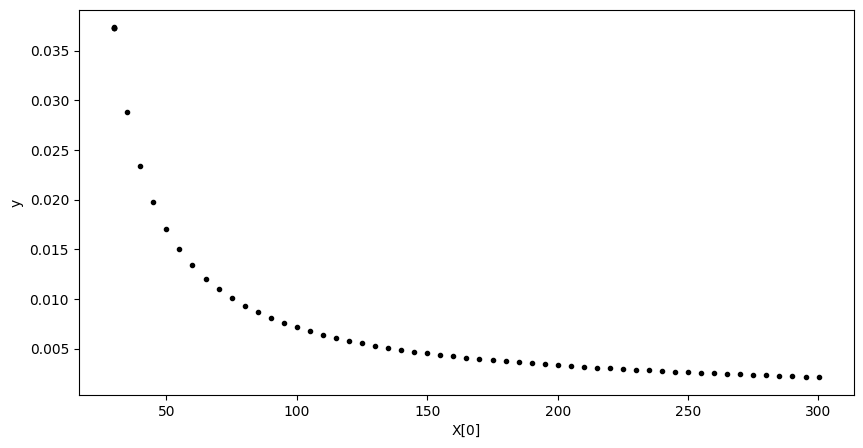

In [ ]:
n_dim = X_array.shape[0]
fig, ax = plt.subplots(n_dim, 1, figsize=(10,5))
for i in range (n_dim):
    curr_ax = ax if n_dim==1 else ax[i]
    curr_ax.plot(X_array[i], y_array, 'k.',)
    curr_ax.set_xlabel("X[%i]"%(i))
    curr_ax.set_ylabel("y")
plt.show()

In [ ]:
#Device
DEVICE = 'cpu'
if torch.cuda.is_available():
    DEVICE = 'cuda'
print(DEVICE)

cpu


In [ ]:
# ------ Vectors ------
# Stack of all input variables
X = torch.tensor(X_array).to(DEVICE)
# Output of symbolic function to guess
y = torch.tensor(y_array).to(DEVICE)

# ------ Constants ------
H = torch.tensor(np.array(99.928116)).to(DEVICE)
#m = torch.tensor(np.array(m)).to(DEVICE)
#g = torch.tensor(np.array(g)).to(DEVICE)

**Library config**

In [ ]:
# [length, mass, time]
args_make_tokens = {
                # operations
                "op_names"             : ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log", "sin", "cos"],
                "use_protected_ops"    : True,
                # input variables
                "input_var_ids"        : {"T" : 0         ,},
                "input_var_units"      : {"T" : [0, 0, 0] ,},
                "input_var_complexity" : {"T" : 1.        ,},
                # constants
                "constants"            : {"1" : H    , },
                "constants_units"      : {"1" : [0, 0, 0] , },
                "constants_complexity" : {"1" : 1.        , },
                # free constants
                "free_constants"            : {"C"               , "theta"               , },
                "free_constants_init_val"   : {"C" : 1.          , "theta" : 1.          , },
                "free_constants_units"      : {"C" : [0, 0, 0]   , "theta" : [0, 0, 0]   , },
                "free_constants_complexity" : {"C" : 1.          ,  "theta" : 1.          , },
                    }

library_config = {"args_make_tokens"  : args_make_tokens,
                  "superparent_units" : [0, 0, 0],
                  "superparent_name"  : "M",
                }

In [ ]:
#@title Learning config

reward_config = {
                 "reward_function"     : physo.physym.reward.SquashedNRMSE, # PHYSICALITY
                 "zero_out_unphysical" : True,
                 "zero_out_duplicates" : False,
                 "keep_lowest_complexity_duplicate" : False,
                }



BATCH_SIZE = int(1e3)
MAX_LENGTH = 35
GET_OPTIMIZER = lambda model : torch.optim.Adam(
                                    model.parameters(),                
                                    lr=0.0025, #0.001, #0.0050, #0.0005, #1,  #lr=0.0025
                                                )
learning_config = {
    # Batch related
    'batch_size'       : BATCH_SIZE,
    'max_time_step'    : MAX_LENGTH,
    'n_epochs'         : int(1e9),
    # Loss related
    'gamma_decay'      : 0.7,
    'entropy_weight'   : 0.005,
    # Reward related
    'risk_factor'      : 0.05,
    'rewards_computer' : physo.physym.reward.make_RewardsComputer (**reward_config),
    # Optimizer
    'get_optimizer'    : GET_OPTIMIZER,
    'observe_units'    : True,
}

In [ ]:
free_const_opti_args = {
            'loss'   : "MSE",
            'method' : 'LBFGS',
            'method_args': {
                        'n_steps' : 15,
                        'tol'     : 1e-8,
                        'lbfgs_func_args' : {
                            'max_iter'       : 4,
                            'line_search_fn' : "strong_wolfe",
                                             },
                            },
        }

In [ ]:
priors_config  = [
                #("UniformArityPrior", None),
                # LENGTH RELATED
                ("HardLengthPrior"  , {"min_length": 4, "max_length": MAX_LENGTH, }),
                ("SoftLengthPrior"  , {"length_loc": 6, "scale": 5, }),
                # RELATIONSHIPS RELATED
                ("NoUselessInversePrior"  , None),
                ("PhysicalUnitsPrior", {"prob_eps": np.finfo(np.float32).eps}), # PHYSICALITY
                #("NestedFunctions", {"functions":["exp",], "max_nesting" : 1}),
                #("NestedFunctions", {"functions":["log",], "max_nesting" : 1}),
                ("NestedTrigonometryPrior", {"max_nesting" : 1}),
                ("OccurrencesPrior", {"targets" : ["1",], "max" : [3,] }),
                 ]

In [ ]:
cell_config = {
    "hidden_size" : 128,
    "n_layers"    : 1,
    "is_lobotomized" : False,
}

In [ ]:
save_path_training_curves = 'MT_curves.png'
save_path_log             = 'MT.log'

run_logger     = monitoring.RunLogger(save_path = save_path_log, 
                                      do_save = True)

run_visualiser = monitoring.RunVisualiser (epoch_refresh_rate = 10,
                                           save_path = save_path_training_curves,
                                           do_show   = False,
                                           do_prints = True,
                                           do_save   = True, )

In [ ]:
run_config = {
    "learning_config"      : learning_config,
    "reward_config"        : reward_config,
    "free_const_opti_args" : free_const_opti_args,
    "library_config"       : library_config,
    "priors_config"        : priors_config,
    "cell_config"          : cell_config,
    "run_logger"           : run_logger,
    "run_visualiser"       : run_visualiser,
}

# Run

In [ ]:
#run PhySO.fit function
#rewards, candidates = physo.fit(X, y, run_config,stop_reward = 0.9999, stop_after_n_epochs = 5)

In [ ]:
#run train_ppo.train_ppo function to learn
rewards, candidates = train_ppo.train_ppo(X, y, run_config,
                                stop_reward = 0.9999, 
                                stop_after_n_epochs = 5)

=========== Epoch 00000 ===========
-> Time 6.14 s

Overall best  at R=0.910119
-> Raw expression : 
        ⎛        1         ⎞
-C + sin⎜──────────────────⎟
        ⎜             1    ⎟
        ⎜    -1 + ─────────⎟
        ⎜               0.5⎟
        ⎜         ⎛ 0.5⎞   ⎟
        ⎜         ⎝1   ⎠   ⎟
        ⎜T + ──────────────⎟
        ⎝          T       ⎠

Best of epoch at R=0.910119
-> Raw expression : 
        ⎛        1         ⎞
-C + sin⎜──────────────────⎟
        ⎜             1    ⎟
        ⎜    -1 + ─────────⎟
        ⎜               0.5⎟
        ⎜         ⎛ 0.5⎞   ⎟
        ⎜         ⎝1   ⎠   ⎟
        ⎜T + ──────────────⎟
        ⎝          T       ⎠


=========== Epoch 00001 ===========
-> Time 70.28 s

Overall best  at R=0.981225
-> Raw expression : 
                               2
  ⎛         C⋅(cos(θ) + 1) + T⎞ 
  ⎜-θ + 1 + ──────────────────⎟ 
  ⎜                 T         ⎟ 
T⋅⎜───────────────────────────⎟ 
  ⎝             T             ⎠ 

Best of epoch at R=0.981